## **Project 1**

#### **Pre-processing of the Data**

We need first to transform the data as we did in the ProjectEx1 :

In [119]:
import pandas as pd
import matplotlib.pyplot as plt


diseases_df = pd.read_csv("CVD_cleaned.csv")

#Transfomation of the column "Sex" to a binary column "Is_Male with value 1 if the patient is a male and 0 if not".

diseases_df.rename(columns={'Sex': 'Is_Male'}, inplace=True)
diseases_df['Is_Male'] = diseases_df['Is_Male'].map({'Male': 1, 'Female': 0})

#Converts the ages intervals into a numeric value that represents the interval (average of the interval)

def convert_age(age_category):
  if age_category != "80+":

    ages = [int(age) for age in age_category.split('-')]
    average_age = sum(ages) / len(ages)
  else:

    average_age = 85
  return int(average_age)

diseases_df.rename(columns={'Age_Category': 'Age'}, inplace=True)
diseases_df['Age'] = diseases_df['Age'].apply(convert_age)

# Transforms those category to binary categories with 1 when "Yes" and 0 when "No". For "Diabetes" we convert this to 4 categories.
binary_features = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
                   'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

for feature in binary_features:
  diseases_df[feature] = diseases_df[feature].map({'Yes': 1, 'Yes, but female told only during pregnancy': 2,
                                                   'No, pre-diabetes or borderline diabetes': 3, 'No': 0})

# Maps for each level of a general health, we grade from 0 to 4.
diseases_df['General_Health'] = diseases_df['General_Health'].map({'Excellent': 4, 'Very Good': 3,
                                                            'Good': 2, 'Fair': 1, 'Poor': 0})

#Transform the type of the feature "Chcekup" from object to string

diseases_df = diseases_df.astype({'Checkup': 'string'})

diseases_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past 2 years,0,0,0,0,0,0,1,0,72,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,Within the past year,0,1,0,0,0,1,0,0,72,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,Within the past year,1,0,0,0,0,1,0,0,62,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,Within the past year,1,1,0,0,0,1,0,1,77,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,Within the past year,0,0,0,0,0,0,0,1,85,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,Within the past year,1,0,0,0,0,0,0,1,27,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,Within the past 5 years,1,0,0,0,0,1,0,1,67,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,3,5 or more years ago,1,0,0,0,1,2,0,0,32,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,3,Within the past year,1,0,0,0,0,0,0,1,67,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


##### **Question 1 : Estimation**

Our question is : Does the value of the height differs between people that smoke or have ever smoked and people who never smoke ?

a) We now calculate the averaged height of the two categories :

In [120]:
diseases_smoking = diseases_df[diseases_df['Smoking_History'] == 1]
diseases_no_smoking = diseases_df[diseases_df['Smoking_History'] == 0]

avg_height_smoking = diseases_smoking['Height_(cm)'].mean()
avg_height_no_smoking = diseases_no_smoking['Height_(cm)'].mean()

print(f"The smoking people's average height is {avg_height_smoking} cm")
print(f"The no-smoking people's average height is {avg_height_no_smoking} cm")

The smoking people's average height is 171.28318591135522 cm
The no-smoking people's average height is 170.15951304537285 cm


b) We now calculate the approximate confidence interval for each category:

We now use the the MLE for the esperence of X which is the sample average. Because of the sample average is the MLE of the esperence of X, then it is asymptotically normal. With multiplication by the se and adding the esperence, we can obtain the exiged distribution of the sample average.

In [121]:
# We will use the biased estimator of the variance.

smoking_height_variance = diseases_smoking['Height_(cm)'].var(ddof=0)
no_smoking_height_variance = diseases_no_smoking['Height_(cm)'].var(ddof=0)

sample_size_smoking = diseases_smoking.shape[0]
sample_size_no_smoking = diseases_no_smoking.shape[0]

smoking_se = ((1/sample_size_smoking) * smoking_height_variance) ** (1/2)
no_smoking_se = ((1/sample_size_no_smoking) * no_smoking_height_variance) ** (1/2)

confidence_interval_smoking = [avg_height_smoking - 2 * smoking_se, avg_height_smoking + 2 * smoking_se]
confidence_interval_no_smoking = [avg_height_no_smoking - 2 *no_smoking_se, avg_height_no_smoking + 2 * no_smoking_se]

print(f"The confidence interval with level of confidence of 95% for the smoking people's height average is: {confidence_interval_smoking} ")
print(f"The confidence interval with level of confidence of 95% for the no-smoking people's height average is: {confidence_interval_no_smoking}")

The confidence interval with level of confidence of 95% for the smoking people's height average is: [171.22380277577565, 171.34256904693478] 
The confidence interval with level of confidence of 95% for the no-smoking people's height average is: [170.10940540296036, 170.20962068778533]


c) The two confidence intervals are disjoint. The signification of this fact is when we know the true value of one of the esperences, we can determine to which category it belongs to.

#### **Question 2 : Hypothesis Testing**

a) Let us denote 𝜇1 being the esperence of the height of the smoking people and 𝜇2 being the esperence of the height of the no-smoking people. So, we want to check the hypotheses:

𝐻0: 𝜇1 − 𝜇2 = 0

𝐻1: 𝜇1 − 𝜇2 ≠ 0


b) We plot the histogram of the data to check normality:

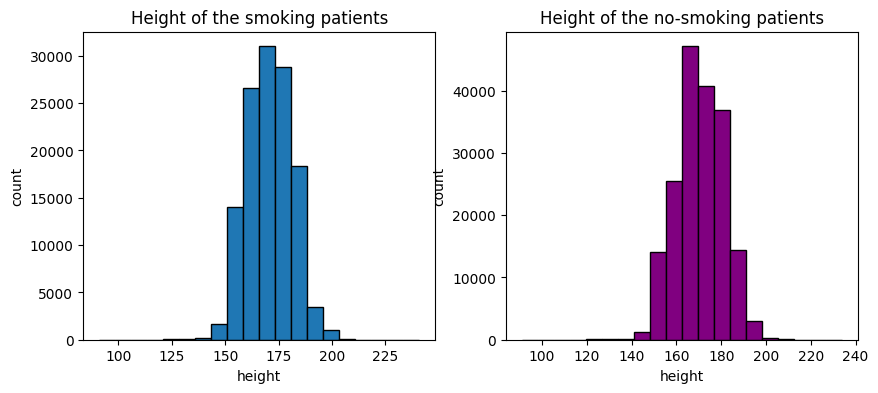

In [122]:
# Plot the histograms of the two categories

plots, (axis_0, axis_1) = plt.subplots(1, 2, figsize=(10,4))

diseases_smoking['Height_(cm)'].hist(edgecolor='black', grid=False, bins=20, ax=axis_0)
axis_0.set_title('Height of the smoking patients')
axis_0.set_xlabel('height')
axis_0.set_ylabel('count')

diseases_no_smoking['Height_(cm)'].hist(edgecolor='black', grid=False, bins=20, ax=axis_1, color='purple')
axis_1.set_title('Height of the no-smoking patients')
axis_1.set_xlabel('height')
axis_1.set_ylabel('count')

plt.show()

We now check equality of the variance with F-test:

In [123]:
# Performing the F-test

from scipy.stats import f, t, norm, chi2

S_smoking_square = diseases_smoking['Height_(cm)'].var(ddof=1)
S_no_smoking_square = diseases_no_smoking['Height_(cm)'].var(ddof=1)
alpha = 0.05

if S_smoking_square >= S_no_smoking_square:
  F_statistic = S_smoking_square / S_no_smoking_square
  F_rejection_region = f.ppf(1 - alpha, sample_size_smoking - 1, sample_size_no_smoking - 1)

else:
  F_statistic = S_no_smoking_square / S_smoking_square
  F_rejection_region = f.ppf(1 - alpha, sample_size_no_smoking - 1, sample_size_smoking - 1)

print(f"F Statistic: {F_statistic}")
print(f"F test quantile: {F_rejection_region}")
print(f"The variances of the two categories are equal with level of confidence of {100*(1 - alpha)}% ? {F_statistic <= F_rejection_region}")

F Statistic: 1.043526139233888
F test quantile: 1.008565251000049
The variances of the two categories are equal with level of confidence of 95.0% ? False


Not all the conditions of the T-test hold because according to the F-test the variances are not equal (with level of confidence 95%)

c) Now we will perform the T-test:

In [124]:
# Performing the T-test

alpha = 0.05
Sp_square = ((sample_size_smoking - 1) * S_smoking_square + (sample_size_no_smoking - 1) *
             S_no_smoking_square) / (sample_size_smoking + sample_size_no_smoking - 2)

T_statistic = (avg_height_smoking - avg_height_no_smoking) / (Sp_square * ((1/sample_size_smoking) + (1/sample_size_no_smoking))) ** (1/2)
p_value_T = 1 - t.cdf(T_statistic, sample_size_smoking + sample_size_no_smoking - 2)

print(f"T statistic: {T_statistic}")
print(f"P-value of T-test: {p_value_T}")

if avg_height_smoking >= avg_height_no_smoking:
  T_rejection_region = t.ppf(1 - alpha/2, sample_size_smoking + sample_size_no_smoking - 2)

  print(f"T test quantile: {T_rejection_region}")
  print(f"The averages of the two categories are equal with level of confidence {100 *(1 - alpha)}% ? {T_statistic <= T_rejection_region}")

else:
  T_rejection_region = t.ppf(alpha/2, sample_size_smoking + sample_size_no_smoking - 2)

  print(f"T test quantile: {T_rejection_region}")
  print(f"The averages of the two categories are equal with level of confidence {100 *(1 - alpha)}% ? {T_statistic >= T_rejection_region}")

T statistic: 28.807537189939946
P-value of T-test: 0.0
T test quantile: 1.9599716655017085
The averages of the two categories are equal with level of confidence 95.0% ? False


d) Now we will perform the Wald Test:

In [125]:
alpha = 0.05
wald_statistic = (avg_height_smoking - avg_height_no_smoking) / ((smoking_height_variance / sample_size_smoking) +
                                            (no_smoking_height_variance / sample_size_no_smoking)) ** (1/2)
p_value_wald = 2 * norm.cdf(-abs(wald_statistic))
wald_rejection_region = norm.ppf(1 - alpha/2)

print(f"Wald statistic: {wald_statistic}")
print(f"P-value of Wald Test: {p_value_wald}")
print(f"Wald Test quantile: {wald_rejection_region}")
print(f"The averages of the two categories are equal with level of confidence {100 *(1 - alpha)}% ? {abs(wald_statistic) <= wald_rejection_region}")

Wald statistic: 28.923745489567544
P-value of Wald Test: 6.004351745487043e-184
Wald Test quantile: 1.959963984540054
The averages of the two categories are equal with level of confidence 95.0% ? False


e) In both tests, we rejected the null hypothesis. Furthermore, the p-values of both test are 0 so it means that the level of confidence of the test is near to 100%. It strenghtens what we said in question 1)c).

f) The likelihood ratio test is :

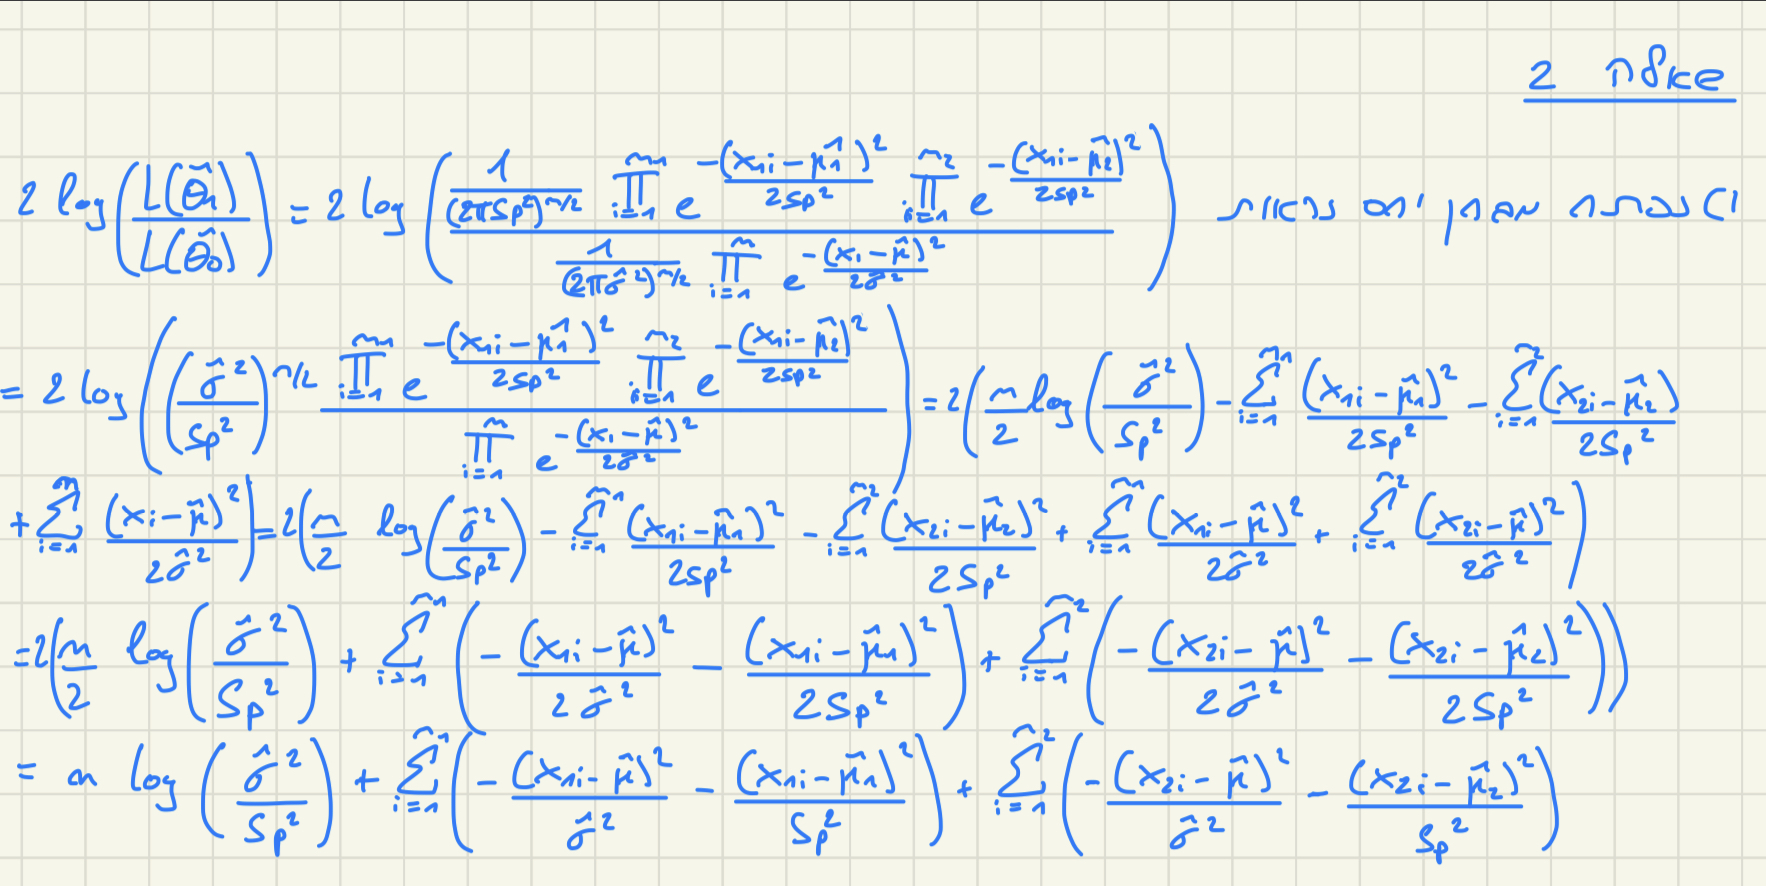

The number of freedom of the Chi-Square distribution is : dim(Θ1) - dim(Θ0) = dim ({𝜇1, 𝜇2}) - dim({𝜇}) = 2 - 1 = 1

In [126]:
def build_sum_element(values, n_category, S_p_squared, variance_estimate,mu_estimate_category,mu_estimate_all):
  sum = 0

  for i in range(n_category):
    sum += (values[i]-mu_estimate_all)**2/variance_estimate - (values[i]-mu_estimate_category)**2 / S_p_squared

  return sum

In [127]:
import math

alpha = 0.05

smoking_values = diseases_smoking["Height_(cm)"].values
no_smoking_values = diseases_no_smoking["Height_(cm)"].values
sample_total_variance = diseases_df["Height_(cm)"].var(ddof = 0)
avg_all = diseases_df["Height_(cm)"].mean()
n = diseases_df.shape[0]

log_element = n * math.log(sample_total_variance/Sp_square)
smoking_element = build_sum_element(smoking_values, sample_size_smoking, Sp_square, sample_total_variance, avg_height_smoking,avg_all)
no_smoking_element = build_sum_element(no_smoking_values, sample_size_no_smoking, Sp_square, sample_total_variance, avg_height_no_smoking,avg_all)

chi2_statistic = log_element + smoking_element + no_smoking_element
chi2_rejection_region = chi2.ppf(1 - alpha, 1)

print(f"The statistic of the likelihood ratio test is: {chi2_statistic}")
print(f"The test quantile is: {chi2_rejection_region}")
print(f"The averages of the two categories are equal with level of confidence {100 *(1 - alpha)}% ? {chi2_statistic <= chi2_rejection_region}")

The statistic of the likelihood ratio test is: 828.7666313075085
The test quantile is: 3.841458820694124
The averages of the two categories are equal with level of confidence 95.0% ? False


####**Question 3 : Influence of sample size**

a) We will sample in a random way 4 samples of different size :

In [128]:
#Sample the dataframe and separate them into two categories and store them in a dictionary.
#Check also if the two categories are represented in the sample.

samples = {}
sizes = [30, 50, 100, 500]

for i in sizes:
  two_categories = False

  while not two_categories:
    sample_df = diseases_df.sample(i)
    only_smoking = sample_df[sample_df['Smoking_History'] == 1]
    only_no_smoking = sample_df[sample_df['Smoking_History'] == 0]

    if only_smoking.shape[0] != 0 and only_no_smoking.shape[0] != 0:
      two_categories = True

  samples[f"{i}"] = [only_no_smoking, only_smoking]

b) We now build the confidence interval for all the samples: We will take the MLE of the esperence which is the sample average.

In [129]:
#Compute the confidence intervals.

confidence_intervals = {}
means = {}
categories_size = {}

for key in samples:
  avg_sample_no_smoking = samples[key][0]['Height_(cm)'].mean()
  avg_sample_smoking = samples[key][1]['Height_(cm)'].mean()

  no_smoking_sample_variance = samples[key][0]['Height_(cm)'].var(ddof=0)
  smoking_sample_variance = samples[key][1]['Height_(cm)'].var(ddof=0)

  size_sample_no_smoking = samples[key][0].shape[0]
  size_sample_smoking = samples[key][1].shape[0]

  no_smoking_sample_se = ((1/size_sample_no_smoking) * no_smoking_sample_variance) ** (1/2)
  smoking_sample_se = ((1/size_sample_smoking) * smoking_sample_variance) ** (1/2)

  confidence_interval_sample_no_smoking = [avg_sample_no_smoking - 2 *no_smoking_sample_se, avg_sample_no_smoking + 2 * no_smoking_sample_se]
  confidence_interval_sample_smoking = [avg_sample_smoking - 2 * smoking_sample_se, avg_sample_smoking + 2 * smoking_sample_se]

  means[key] = [avg_sample_no_smoking, avg_sample_smoking]
  categories_size[key] = [size_sample_no_smoking, size_sample_smoking]
  confidence_intervals[key] = [confidence_interval_sample_no_smoking, confidence_interval_sample_smoking]

In [130]:
#Print the confidence intervals

print("Confidence intervals:")

for key in confidence_intervals:

  print(f"The 95%-interval confidence of the sample of size {key} of the no-smoking people's average height is : {confidence_intervals[key][0]}")
  print(f"The 95%-interval confidence of the sample of size {key} of the smoking people's average height is : {confidence_intervals[key][1]}")
  print()

print(f"Reminder : the 95%-interval confidence of the whole data of the no-smoking people's average height is: {confidence_interval_no_smoking}")
print(f"Reminder : the 95%-interval confidence of the whole data of the smoking people's average height is: {confidence_interval_smoking}")

print("*" * 100)
print("Length of the confidence intervals:")

for key in confidence_intervals:

  print(f"{key} : no-smoking: {confidence_intervals[key][0][1] - confidence_intervals[key][0][0]}")
  print(f"{key} : smoking: {confidence_intervals[key][1][1] - confidence_intervals[key][1][0]}")
  print()

print(f"Whole data: no-smoking: {confidence_interval_no_smoking[1] - confidence_interval_no_smoking[0]}")
print(f"Whole data: smoking: {confidence_interval_smoking[1] - confidence_interval_smoking[0]}")

Confidence intervals:
The 95%-interval confidence of the sample of size 30 of the no-smoking people's average height is : [165.41385778162743, 175.28614221837256]
The 95%-interval confidence of the sample of size 30 of the smoking people's average height is : [160.72222609369067, 173.47777390630932]

The 95%-interval confidence of the sample of size 50 of the no-smoking people's average height is : [167.47926461200694, 176.89573538799306]
The 95%-interval confidence of the sample of size 50 of the smoking people's average height is : [163.27838090892385, 172.94384131329838]

The 95%-interval confidence of the sample of size 100 of the no-smoking people's average height is : [166.72355240847074, 172.2219021369838]
The 95%-interval confidence of the sample of size 100 of the smoking people's average height is : [166.6138562594172, 172.0528104072495]

The 95%-interval confidence of the sample of size 500 of the no-smoking people's average height is : [169.1294143532026, 171.7039189801307]

In question 1, we focused on the whole sample on the two categories and so the length of the confidence interval is very small (because the level of confidence is high). Furthermore, there is no overlap between the confidence intervals of the two categories. In this question we built confidence intervals with different sample's size. We can see that bigger the sample is, smaller the length of the confidence interval is. Furthermore, we can see that there are overlaps between the confidence intervals of the two cateogries for a given sample's size.

c) We now perform the Wald test on all the samples of different sizes:

In [131]:
alpha = 0.05

for key in samples:
  print(f"sample of size : {key}")

  print(f"Average height of no-smoking people: {means[key][0]}")
  print(f"Average height of smoking people: {means[key][1]}")
  print()

  print(f"Percentage of no-smoking records: {categories_size[key][0] * 100 / int(key)}%")
  print(f"Percentage of smoking records: {categories_size[key][1] * 100 / int(key)}%")
  print(f"Confidence interval for no-smoking people: {confidence_intervals[key][0]}")
  print(f"Confidence interval for smoking people: {confidence_intervals[key][1]}")
  print()

  wald_sample_statistic = (means[key][1] - means[key][0]) / ((samples[key][1]['Height_(cm)'].var(ddof=0) / categories_size[key][1]) +
                          (samples[key][0]['Height_(cm)'].var(ddof=0) / categories_size[key][0])) ** (1/2)
  p_value_sample = 2 * norm.cdf(-abs(wald_sample_statistic))

  print(f"Wald statistic: {wald_sample_statistic}")
  print(f"P-value of the Wald test: {p_value_sample}")

  if wald_sample_statistic >= 0:
    wald_sample_rejection_region = norm.ppf(1 - alpha/2)
    print(f"Wald quantile test: {wald_sample_rejection_region}")
    print(f"Rejecting H0 ? {wald_sample_statistic > wald_sample_rejection_region}")

  else:
     wald_sample_rejection_region = norm.ppf(alpha/2)
     print(f"Wald quantile test: {wald_sample_rejection_region}")
     print(f"Rejecting H0 ? {wald_sample_statistic < wald_sample_rejection_region}")

  print()
  print("*" * 100)

sample of size : 30
Average height of no-smoking people: 170.35
Average height of smoking people: 167.1

Percentage of no-smoking records: 66.66666666666667%
Percentage of smoking records: 33.333333333333336%
Confidence interval for no-smoking people: [165.41385778162743, 175.28614221837256]
Confidence interval for smoking people: [160.72222609369067, 173.47777390630932]

Wald statistic: -0.8059685259316759
P-value of the Wald test: 0.42026099722622823
Wald quantile test: -1.9599639845400545
Rejecting H0 ? False

****************************************************************************************************
sample of size : 50
Average height of no-smoking people: 172.1875
Average height of smoking people: 168.11111111111111

Percentage of no-smoking records: 64.0%
Percentage of smoking records: 36.0%
Confidence interval for no-smoking people: [167.47926461200694, 176.89573538799306]
Confidence interval for smoking people: [163.27838090892385, 172.94384131329838]

Wald statistic: -

In question 2, we could reject H0 because we performed the Wald test on the whole data, and we had enough information to reject H0. In this question, no in all sample size, we had enough information to reject H0.


d) We now sample 100 times samples with different sizes and perform Wald test on them:

In [132]:
import numpy as np

#Building dictionaries with key : sample size and values a list of p-values or CI lengths (one for smokers, one for
# non-smokers) of the 100 samples or calculating the percentage of apparition of the mean of the whole data of the two categories.

CI_lengths = {}
p_values = {}
percentages_of_presence = {}

#For each size, we sample 100 samples and calculate the length of the confidence intervals, p-values of the Wald test and the percentage
#of the apparition of the average of the whole data of the two categories.

for size in sizes:
  CI_length_all_samples = []
  p_values_all_samples = []
  percentages_all_samples = []

  for i in range(100):
    two_categories = False

    while not two_categories:
      sample_all_categories = diseases_df.sample(size)
      only_smoking_sample = sample_all_categories[sample_all_categories['Smoking_History'] == 1]
      only_no_smoking_sample = sample_all_categories[sample_all_categories['Smoking_History'] == 0]

      if only_smoking.shape[0] != 0 and only_no_smoking.shape[0] != 0:
        two_categories = True

    avg_sample_no_smoking = only_no_smoking_sample['Height_(cm)'].mean()
    avg_sample_smoking = only_smoking_sample['Height_(cm)'].mean()

    no_smoking_sample_variance = only_no_smoking_sample['Height_(cm)'].var(ddof=0)
    smoking_sample_variance = only_smoking_sample['Height_(cm)'].var(ddof=0)

    size_sample_no_smoking = only_no_smoking_sample.shape[0]
    size_sample_smoking = only_smoking_sample.shape[0]

    no_smoking_sample_se = ((1/size_sample_no_smoking) * no_smoking_sample_variance) ** (1/2)
    smoking_sample_se = ((1/size_sample_smoking) * smoking_sample_variance) ** (1/2)

    len_confidence_interval_sample_no_smoking = 4 *no_smoking_sample_se
    len_confidence_interval_sample_smoking = 4 * smoking_sample_se

    length_CI = [len_confidence_interval_sample_no_smoking, len_confidence_interval_sample_smoking]

    wald_sample_statistic = (avg_sample_smoking - avg_sample_no_smoking) / ((smoking_sample_variance / size_sample_smoking) +
                          (no_smoking_sample_variance / size_sample_no_smoking)) ** (1/2)
    p_value_sample = 2 * norm.cdf(-abs(wald_sample_statistic))

    presence_of_total_mean = [0, 0]

    if avg_height_no_smoking < avg_sample_no_smoking - 2 * no_smoking_sample_se or avg_height_no_smoking > avg_sample_no_smoking + 2 * no_smoking_sample_se :
      presence_of_total_mean[0] = 0

    else:
      presence_of_total_mean[0] = 1

    if avg_height_smoking < avg_sample_smoking - 2 * smoking_sample_se or avg_height_smoking > avg_sample_smoking + 2 * smoking_sample_se :
      presence_of_total_mean[1] = 0

    else:
      presence_of_total_mean[1] = 1

    CI_length_all_samples.append(length_CI)
    p_values_all_samples.append(p_value_sample)
    percentages_all_samples.append(presence_of_total_mean)

  CI_lengths[f"{size}"] = CI_length_all_samples
  p_values[f"{size}"] = p_values_all_samples
  percentages_of_presence[f"{size}"] = [np.mean((np.array(percentages_all_samples))[:, 0]), np.mean((np.array(percentages_all_samples))[:, 1])]

We now plot the histograms:

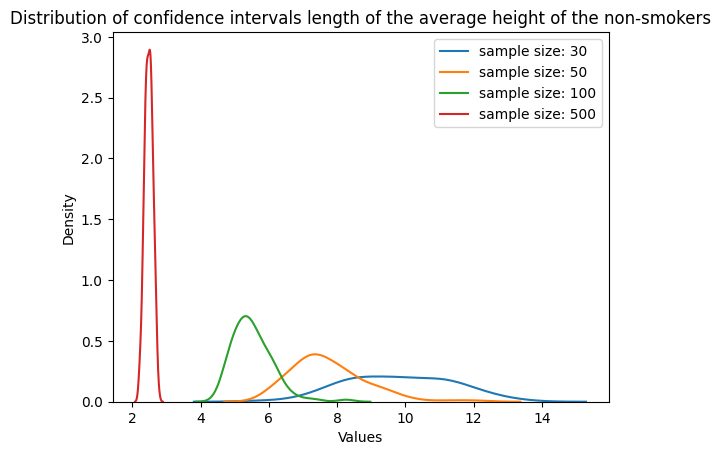

In [133]:
import seaborn as sns

#Confidence interval length of average height of no-smoking patients
for key in CI_lengths:
  data = np.array(CI_lengths[key])[:, 0]
  sns.kdeplot(data, label=f"sample size: {key}", fill=False)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of confidence intervals length of the average height of the non-smokers')

plt.legend()
plt.show()

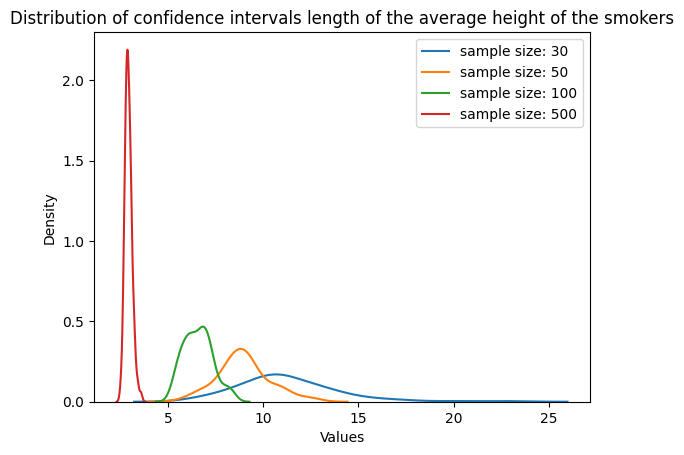

In [134]:
#Confidence interval length of average height of smoking patients
for key in CI_lengths:
  data = np.array(CI_lengths[key])[:, 1]
  sns.kdeplot(data, label=f"sample size: {key}", fill=False)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of confidence intervals length of the average height of the smokers')

plt.legend()
plt.show()

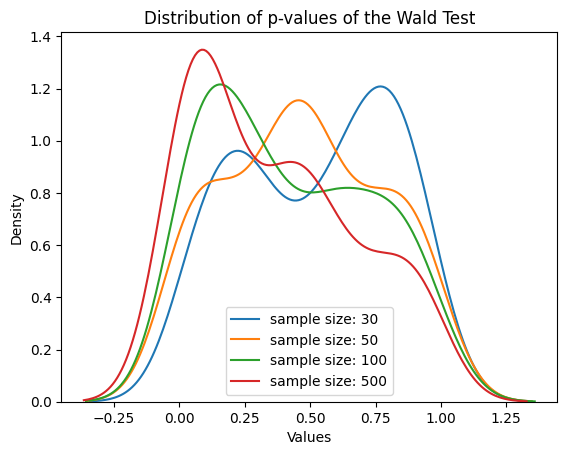

In [135]:
#P-Value of Wald Test of the samples
for key in p_values:
  data = np.array(p_values[key])
  sns.kdeplot(data, label=f"sample size: {key}", fill=False)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of p-values of the Wald Test')

plt.legend()
plt.show()

We choose to represent the p-values and the length of the confidence interval like density function for the two categories. In this way, we can see the difference between the different sample size. We can see that bigger the sample is, smaller the confidence interval length is. It connects to what we learned in the course that more information we have, more confidence we have. We can see that when we increase the size of the sample the density of the p-values reaches to 0.

In [136]:
#Print the percentage of times that the average of each category appeared in the confident intervals

titles = {0: "No-smoking patients", 1: "Smoking patients"}

for i in [0, 1]:
  print(f"{titles[i]}:")

  for key in percentages_of_presence:
      print(f"The average appeared {100 * percentages_of_presence[key][i]}% of the time in the confidence interval of the sample of size {key}")

  print()

No-smoking patients:
The average appeared 96.0% of the time in the confidence interval of the sample of size 30
The average appeared 93.0% of the time in the confidence interval of the sample of size 50
The average appeared 96.0% of the time in the confidence interval of the sample of size 100
The average appeared 98.0% of the time in the confidence interval of the sample of size 500

Smoking patients:
The average appeared 94.0% of the time in the confidence interval of the sample of size 30
The average appeared 95.0% of the time in the confidence interval of the sample of size 50
The average appeared 96.0% of the time in the confidence interval of the sample of size 100
The average appeared 94.0% of the time in the confidence interval of the sample of size 500

